<a href="https://colab.research.google.com/github/raajlearner/ride_data_ML/blob/main/ride_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

#Q3. Linear Regression Problem:
RideWave wants to predict the ride cost using numerical and encoded categorical features.

Describe how you would split the dataset into training and testing sets.

Build a linear regression model in Python (you may write pseudo-code).

Mention one assumption of linear regression and why it matters in this dataset.

In [21]:
from google.colab import files
uploaded=files.upload()

Saving ride_data.csv to ride_data (2).csv


In [23]:
import io
#df=pd.read_csv(io.BytesIO(uploaded['ride_data.csv'].decode('utf-8-sig')),sep=',')
#df = pd.read_csv(io.StringIO(uploaded['ride_data.csv'].decode('utf-8')), sep=None, engine="python")
#df = pd.read_csv(io.StringIO(uploaded['ride_data.csv'].decode('utf-8-sig')), sep=',')
df = pd.read_csv(io.BytesIO(uploaded['ride_data (2).csv']))

df.head()

,ride_id,user_id,driver_rating,distance_km,ride_duration_min,surge_applied,payment_method,ride_cost,cancelled,city
0,101,501,4.5,7.2,15,1,Card,220,0,New York
1,102,502,3.8,3.5,8,0,Cash,90,0,Chicago
2,103,503,4.9,12.0,25,1,Wallet,350,0,Los Angeles
3,104,504,2.5,5.4,14,0,Cash,120,1,Chicago
4,105,505,4.1,9.0,18,1,Card,280,0,New York


In [24]:
df.shape

(15, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ride_id            15 non-null     int64  
 1   user_id            15 non-null     int64  
 2   driver_rating      15 non-null     float64
 3   distance_km        15 non-null     float64
 4   ride_duration_min  15 non-null     int64  
 5   surge_applied      15 non-null     int64  
 6   payment_method     15 non-null     object 
 7   ride_cost          15 non-null     int64  
 8   cancelled          15 non-null     int64  
 9   city               15 non-null     object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ KB


In [27]:
df['ride_cost'].describe()

,ride_cost
count,15.000000
mean,196.666667
std,122.557081
min,45.000000
25%,97.500000
50%,150.000000
75%,295.000000
max,420.000000


In [29]:
df.isnull().sum()

,0
ride_id,0
user_id,0
driver_rating,0
distance_km,0
ride_duration_min,0
surge_applied,0
payment_method,0
ride_cost,0
cancelled,0
city,0


In [30]:
#from sklearn.preprocessing import LabelEncoder

In [31]:
"""le=LabelEncoder()
df['city_encoded']=le.fit_transform(df['city'])"""


In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_col=['city']
ohe=OneHotEncoder(sparse_output=False)
ohe_array=ohe.fit_transform(df[cat_col])
ohe_cols=ohe.get_feature_names_out(cat_col)
ohe_df=pd.DataFrame(ohe_array,columns=ohe_cols)
df_ohe=pd.concat([df.reset_index(drop=True),ohe_df],axis=1)

In [48]:
df_ohe.head()

,ride_id,user_id,driver_rating,distance_km,ride_duration_min,surge_applied,payment_method,ride_cost,cancelled,city,city_encoded,city_Chicago,city_Houston,city_Los Angeles,city_New York
0,101,501,4.5,7.2,15,1,Card,220,0,New York,3,0.0,0.0,0.0,1.0
1,102,502,3.8,3.5,8,0,Cash,90,0,Chicago,0,1.0,0.0,0.0,0.0
2,103,503,4.9,12.0,25,1,Wallet,350,0,Los Angeles,2,0.0,0.0,1.0,0.0
3,104,504,2.5,5.4,14,0,Cash,120,1,Chicago,0,1.0,0.0,0.0,0.0
4,105,505,4.1,9.0,18,1,Card,280,0,New York,3,0.0,0.0,0.0,1.0


In [49]:
x=df_ohe[['driver_rating','distance_km','ride_duration_min','surge_applied']+list(ohe_cols)]
y=df_ohe['ride_cost']

In [ ]:
x

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
model=LinearRegression()

In [54]:
model.fit(x,y)

LinearRegression()

In [55]:
y_pred=model.predict(x)

In [56]:
y_pred

array([230.32276867,  86.61433135, 350.0420207 , 123.71678332,
       274.02681893,  59.02107936, 318.44856881, 101.96319377,
       419.70402591,  42.67693608, 150.        ,  84.01572687,
       335.94638649, 111.99194926, 261.5094105 ])

In [57]:
print("Intercept: \n",model.intercept_)

Intercept: 
 -12.348989152216461


In [58]:
print("Coef:\n",model.coef_)

Coef:
 [  2.40143866  28.88525247  -2.44294291  74.58449045   8.2830132
  15.27585454  -9.50998697 -14.04888076]


In [59]:
#Compute RMSE
rmse=sqrt(mean_squared_error(y,y_pred))
print("RMSE:\n",rmse)

RMSE:
 4.920543854805509


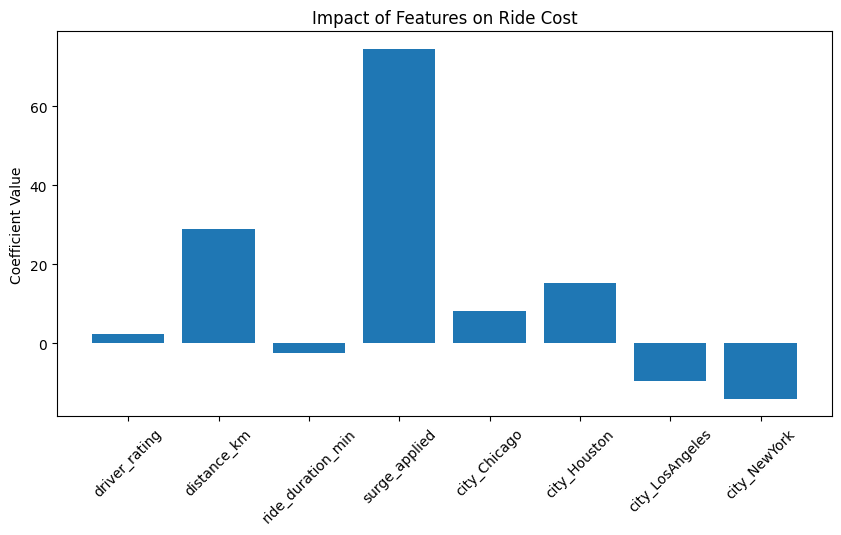

In [60]:
import matplotlib.pyplot as plt

features = ['driver_rating','distance_km','ride_duration_min','surge_applied',
            'city_Chicago','city_Houston','city_LosAngeles','city_NewYork']
coefs = [2.40,28.89,-2.44,74.58,8.28,15.28,-9.51,-14.05]

plt.figure(figsize=(10,5))
plt.bar(features, coefs)
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Impact of Features on Ride Cost")
plt.show()